<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Multivariate_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis Assignment - Arif Aygun

In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

1. Does the performance in the exams vary according to gender, origin and education level of parents?
2. Does lunch type have a relationship with exam performances? How can you explain this, if any?
3. Does the preparation courses have an impact on exam performance?
4. Which lessons are most correlated with each other?

### 1. Data Preprocessing

#### 1.1 Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats.mstats as winsorize
from sqlalchemy import create_engine
import warnings
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100


#### 1.2 Reading Dataset

In [1]:
#df_performance = pd.read_csv('/Users/arifaygun/Documents/GitHub/Data Sets/Magnimind/StudentsPerformance.csv')
#df_performance.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('StudentsPerformance.csv')
df_performance = pd.read_csv(file_path)
df_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2. Exploratory Data Analysis

In [ ]:
df_performance.head().style.set_properties(**{'background-color': '#6e8b3d','color': 'white'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_performance.tail().style.set_properties(**{'background-color': '#6e8b3d','color': 'white'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df_performance.sample(10).reset_index(drop=True).style.set_properties(**{'background-color': '#6e8b3d','color': 'white'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,high school,standard,none,81,84,82
1,female,group C,some college,free/reduced,none,46,64,66
2,female,group D,associate's degree,free/reduced,none,55,76,76
3,female,group E,some high school,free/reduced,none,72,79,77
4,male,group B,associate's degree,standard,none,61,42,41
5,male,group B,associate's degree,standard,completed,91,89,92
6,male,group E,associate's degree,free/reduced,completed,46,43,44
7,male,group B,some college,free/reduced,none,41,39,34
8,male,group D,some college,standard,completed,85,81,85
9,male,group D,some college,free/reduced,completed,69,60,63


In [ ]:
df_performance.shape

(1000, 8)

In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

- The dataset includes 8 columns

In [ ]:
df_performance.isnull().sum()*100/df_performance.shape[0]

gender                        0.00
race/ethnicity                0.00
parental level of education   0.00
lunch                         0.00
test preparation course       0.00
math score                    0.00
reading score                 0.00
writing score                 0.00
dtype: float64

- There is no missing value

In [ ]:
df_performance.duplicated().sum()

0

- There is no duplicated value

In [ ]:
df_performance.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
df_performance.describe()

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [ ]:
df_performance.skew(numeric_only=True)

math score      -0.28
reading score   -0.26
writing score   -0.29
dtype: float64

In [ ]:
df_performance.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.00,0.82,0.80
reading score,0.82,1.00,0.95
writing score,0.80,0.95,1.00


### 3. Multivariate Analysis (explore relationship between attributes)

#### 3.1. Types of scores

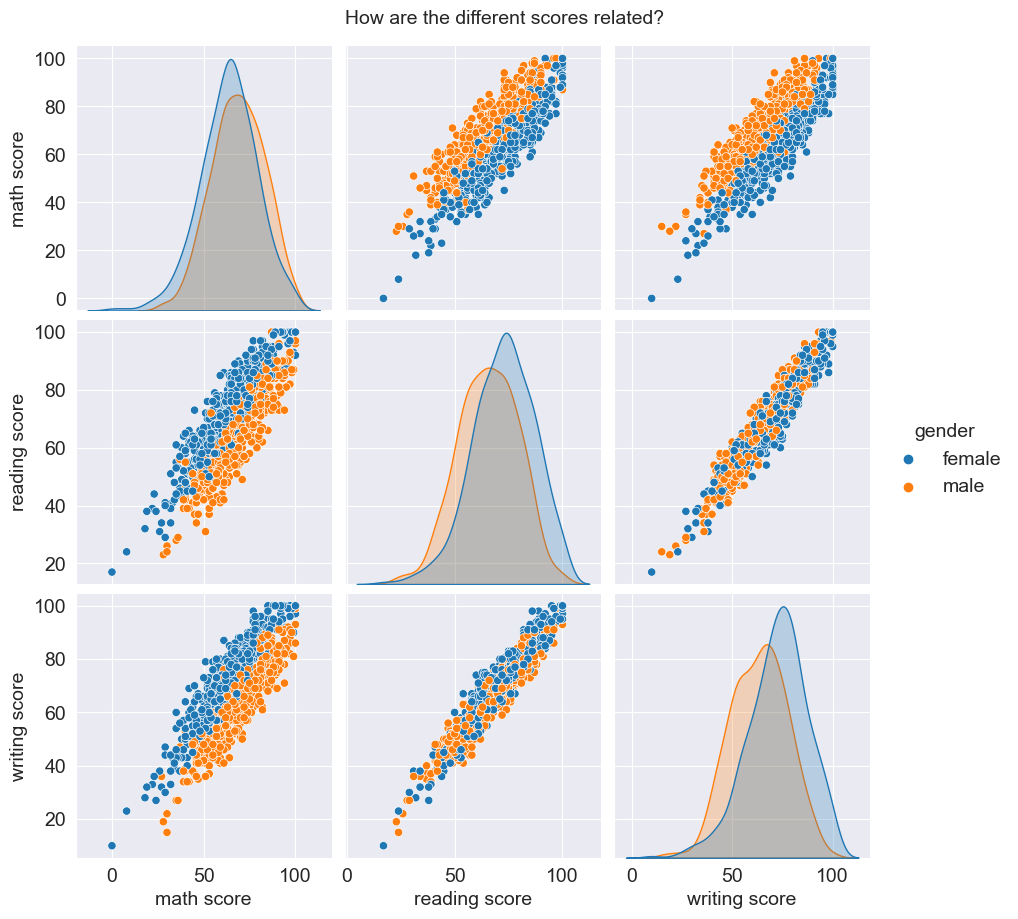

In [ ]:
fig = sns.pairplot(df_performance[["math score", "reading score", "writing score", "gender"]], hue="gender", height=3);
fig.fig.suptitle("How are the different scores related?", size=14, y=1.02);

Text(0.5, 1.0, 'Confusion Matrix')

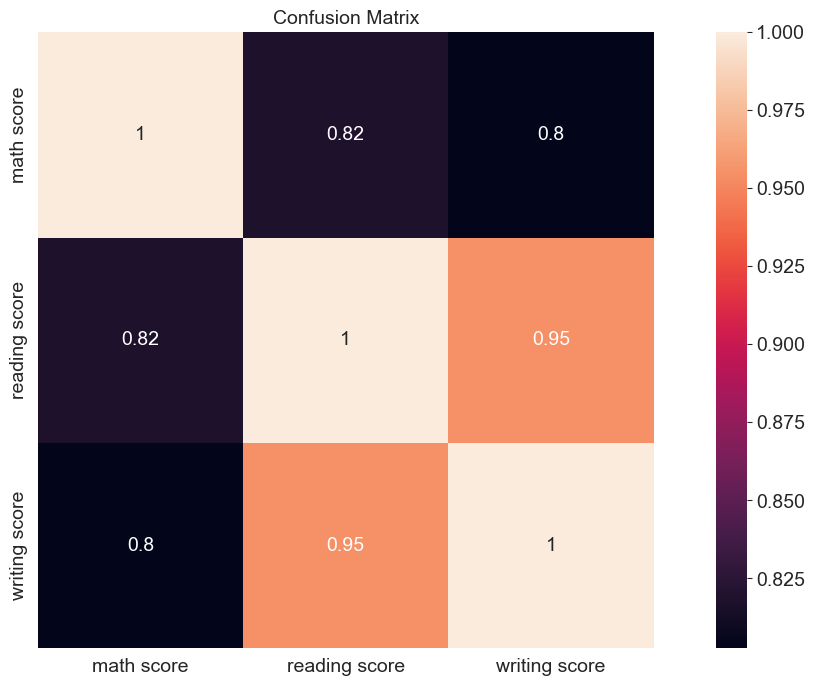

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df_performance.corr(numeric_only=True), annot=True, square=True);
plt.title("Confusion Matrix", fontsize=14)

- From the heatmap, it can be seen that between the types of scores have a correlation relationship with each other. Specifically, this high score tends to lead to other types of scores as well.

#### 3.2. Score and gender

- Calculating the average score by gender using by the trend between gender and score

In [ ]:
import plotly.graph_objs as go

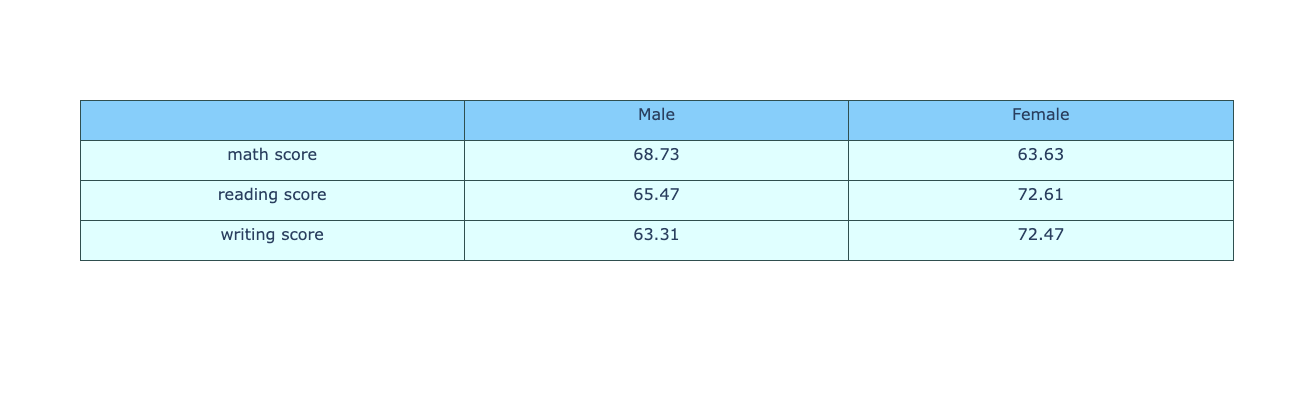

In [ ]:
gender_mean=df_performance.groupby('gender')[['math score','reading score','writing score']].mean().round(2).T

fig = go.Figure(data=[go.Table(
    header=dict(values=['','Male', 'Female'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center',
               height=40,
               font_size=16),
    cells=dict(values=[gender_mean.index,
                       gender_mean['male'],
                       gender_mean['female']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center',
              height=40,
              font_size= 16))
])

fig.update_layout(width=600, height=400)
fig.show()

- The average score of math of the male is higher than that of the female
- The average score of reading and writing of the female is higher than that of the male.

#### 3.3. Score and lunch

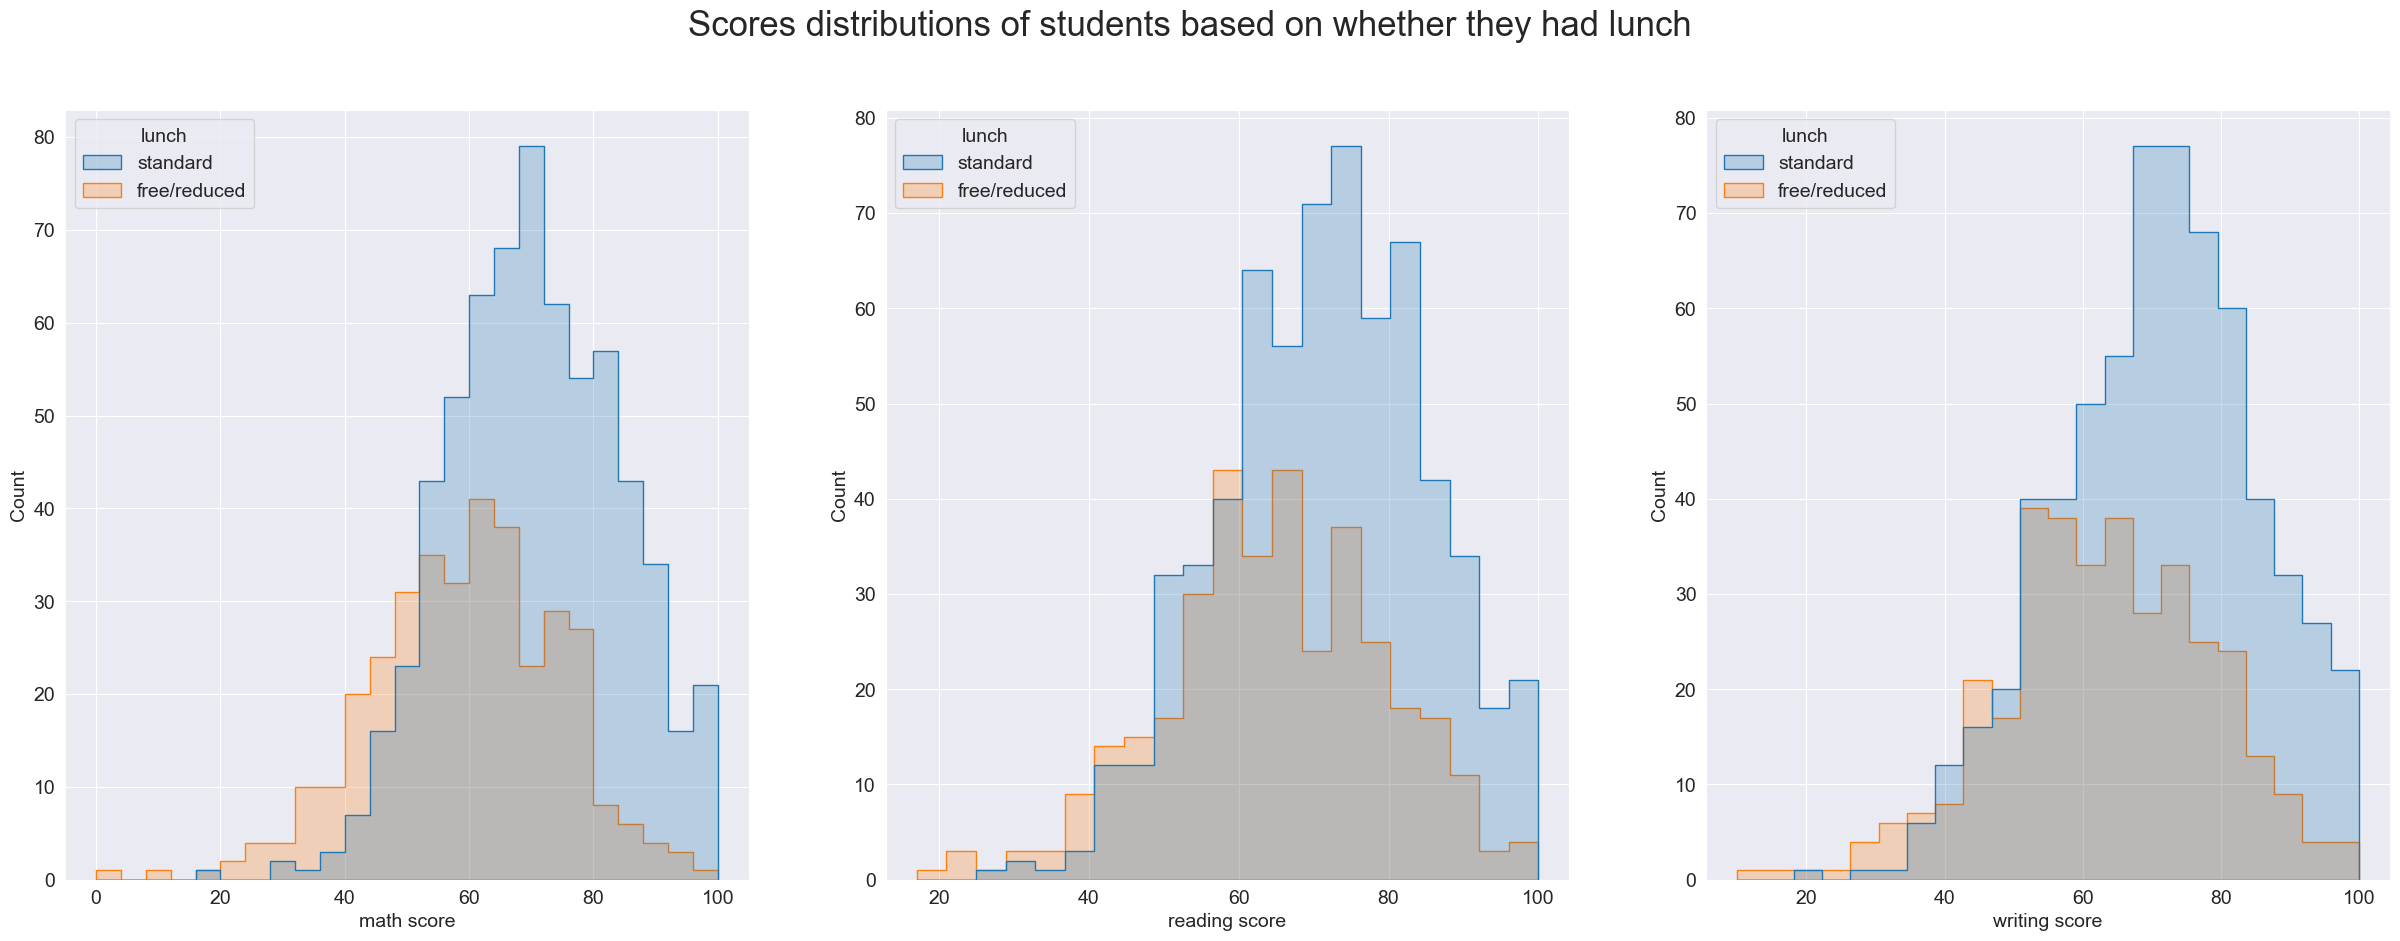

In [ ]:
fig, ax=plt.subplots(ncols=3,figsize=(30,10))

fig.suptitle('Scores distributions of students based on whether they had lunch', size=25)

a=sns.histplot(df_performance,x='math score',ax=ax[0], hue='lunch',element='step')

b=sns.histplot(df_performance,x='reading score',ax=ax[1],hue='lunch',element='step')

c=sns.histplot(df_performance,x='writing score',ax=ax[2],hue='lunch',element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

- Choosing lunch has a big impact on score.
- The number of students who chose the standard lunch had a higher score than the free/reduced lunch option.

#### 3.4. Score and parental level of eduction

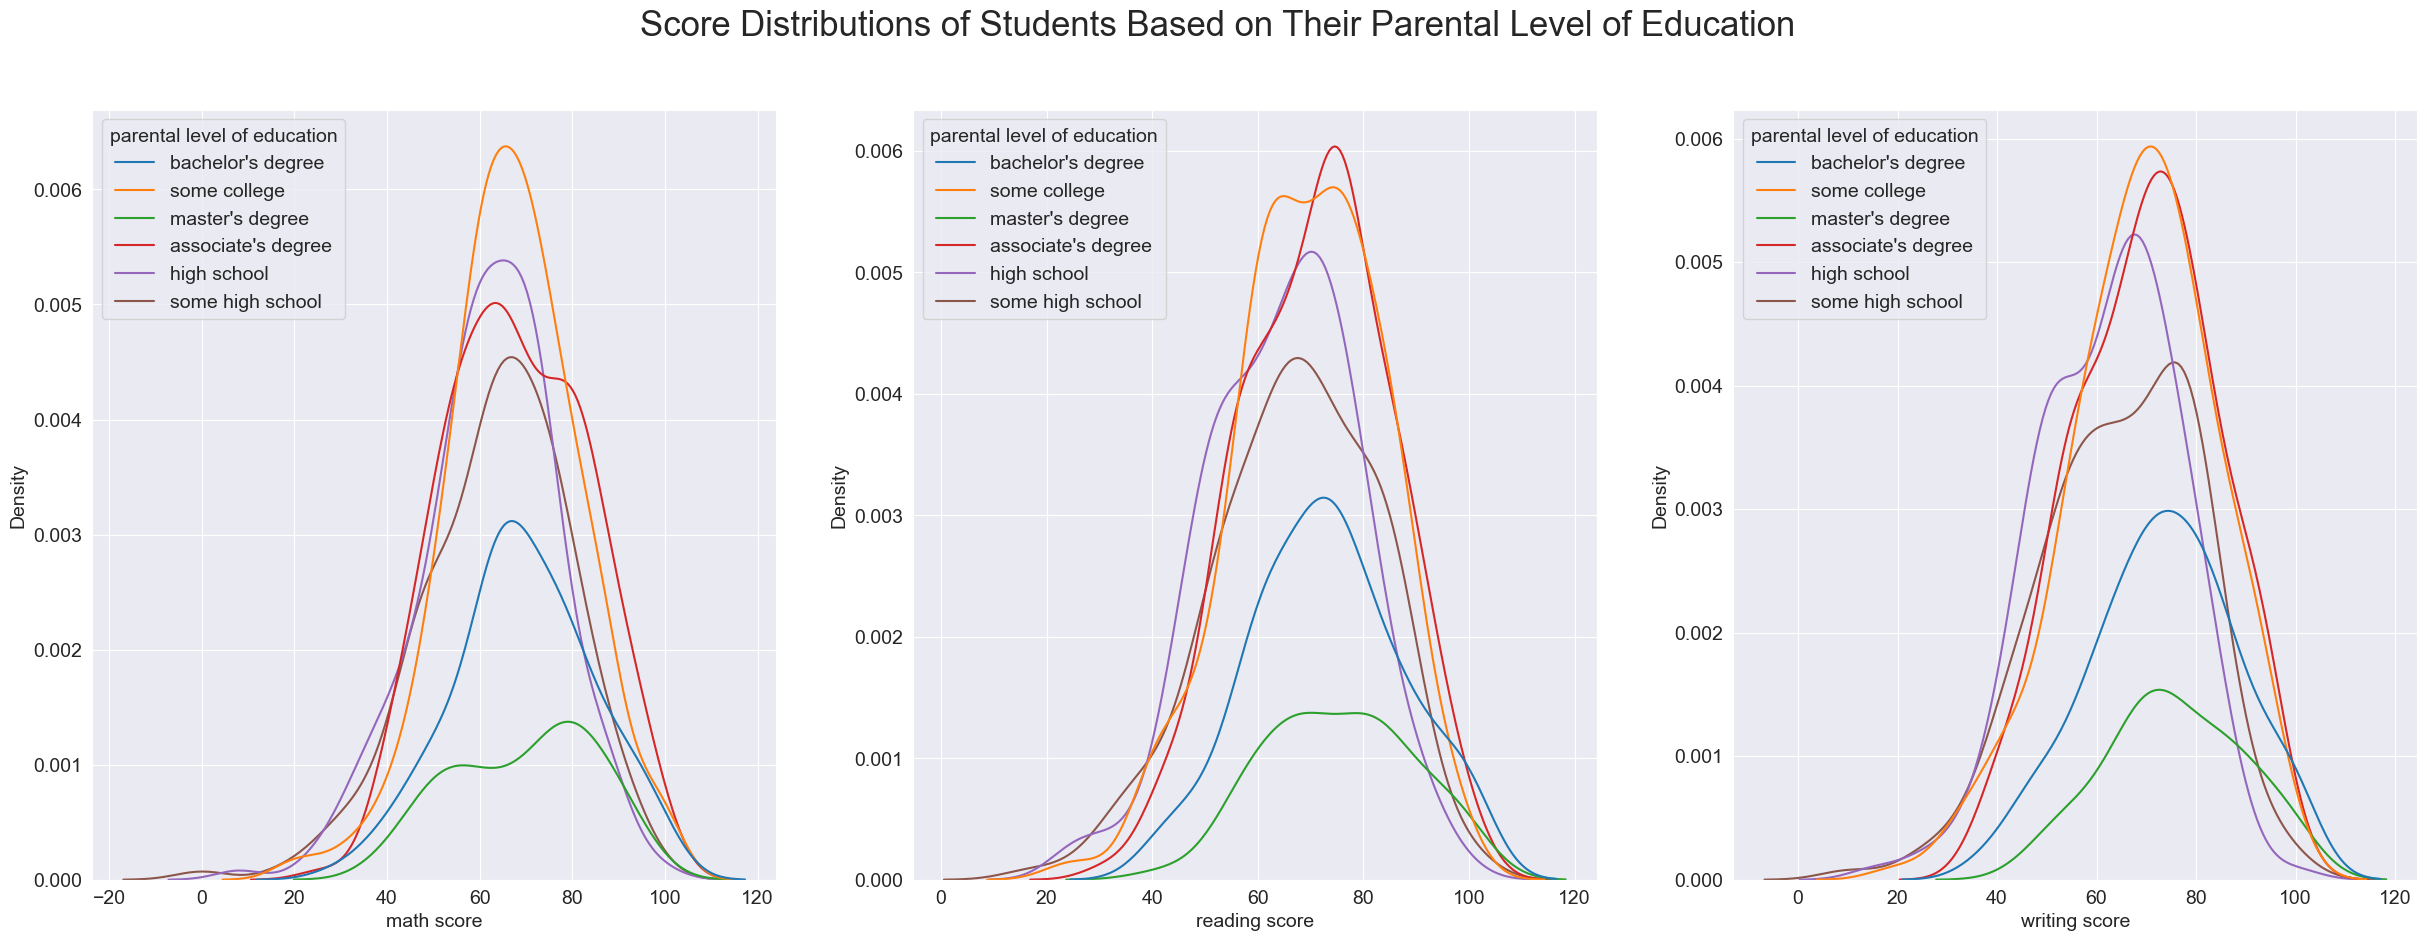

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education', size=25)

a=sns.kdeplot(data=df_performance,x='math score',ax=ax[0], hue='parental level of education')

b= sns.kdeplot(data=df_performance, x='reading score', ax=ax[1], hue='parental level of education')

c= sns.kdeplot(data=df_performance, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

- The education level of parents does not have much influence on the scores of their children.
- When parents have a master's degree, the distribution of their children's scores is higher.

#### 3.5. Score and race (ethnicity)

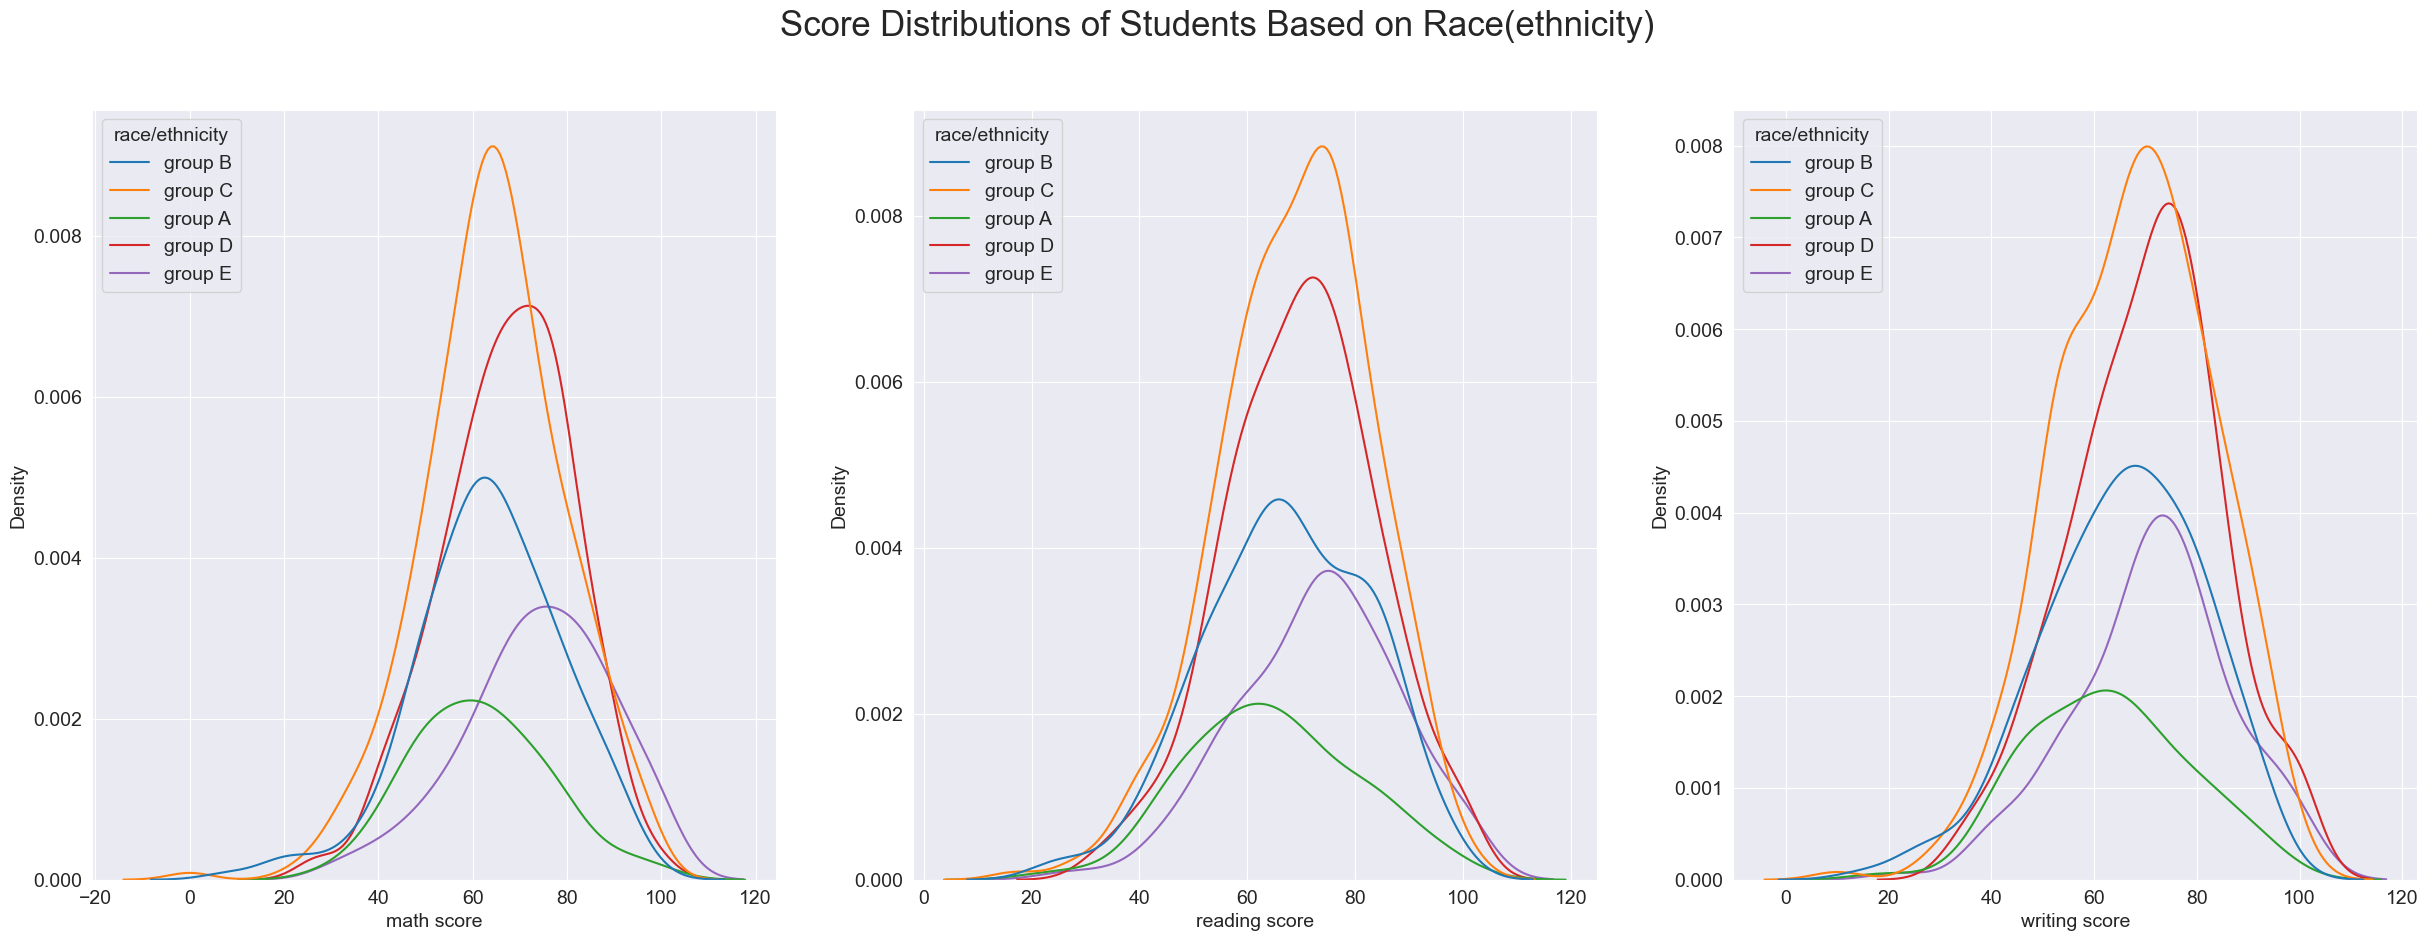

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Race(ethnicity)', size=25)

a=sns.kdeplot(data=df_performance,x='math score',ax=ax[0], hue='race/ethnicity')

b= sns.kdeplot(data=df_performance, x='reading score', ax=ax[1], hue='race/ethnicity')

c= sns.kdeplot(data=df_performance, x='writing score', ax=ax[2], hue='race/ethnicity')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

- Accordimg to the kde plot above, there is slight shift in between the different groups.
- Group E had the most right shift compared to the other groups.
- Therefore, being group E as a race(ethnicity) will make you more likely to get higher scores than others.

#### 3.6. Test preparation course and score

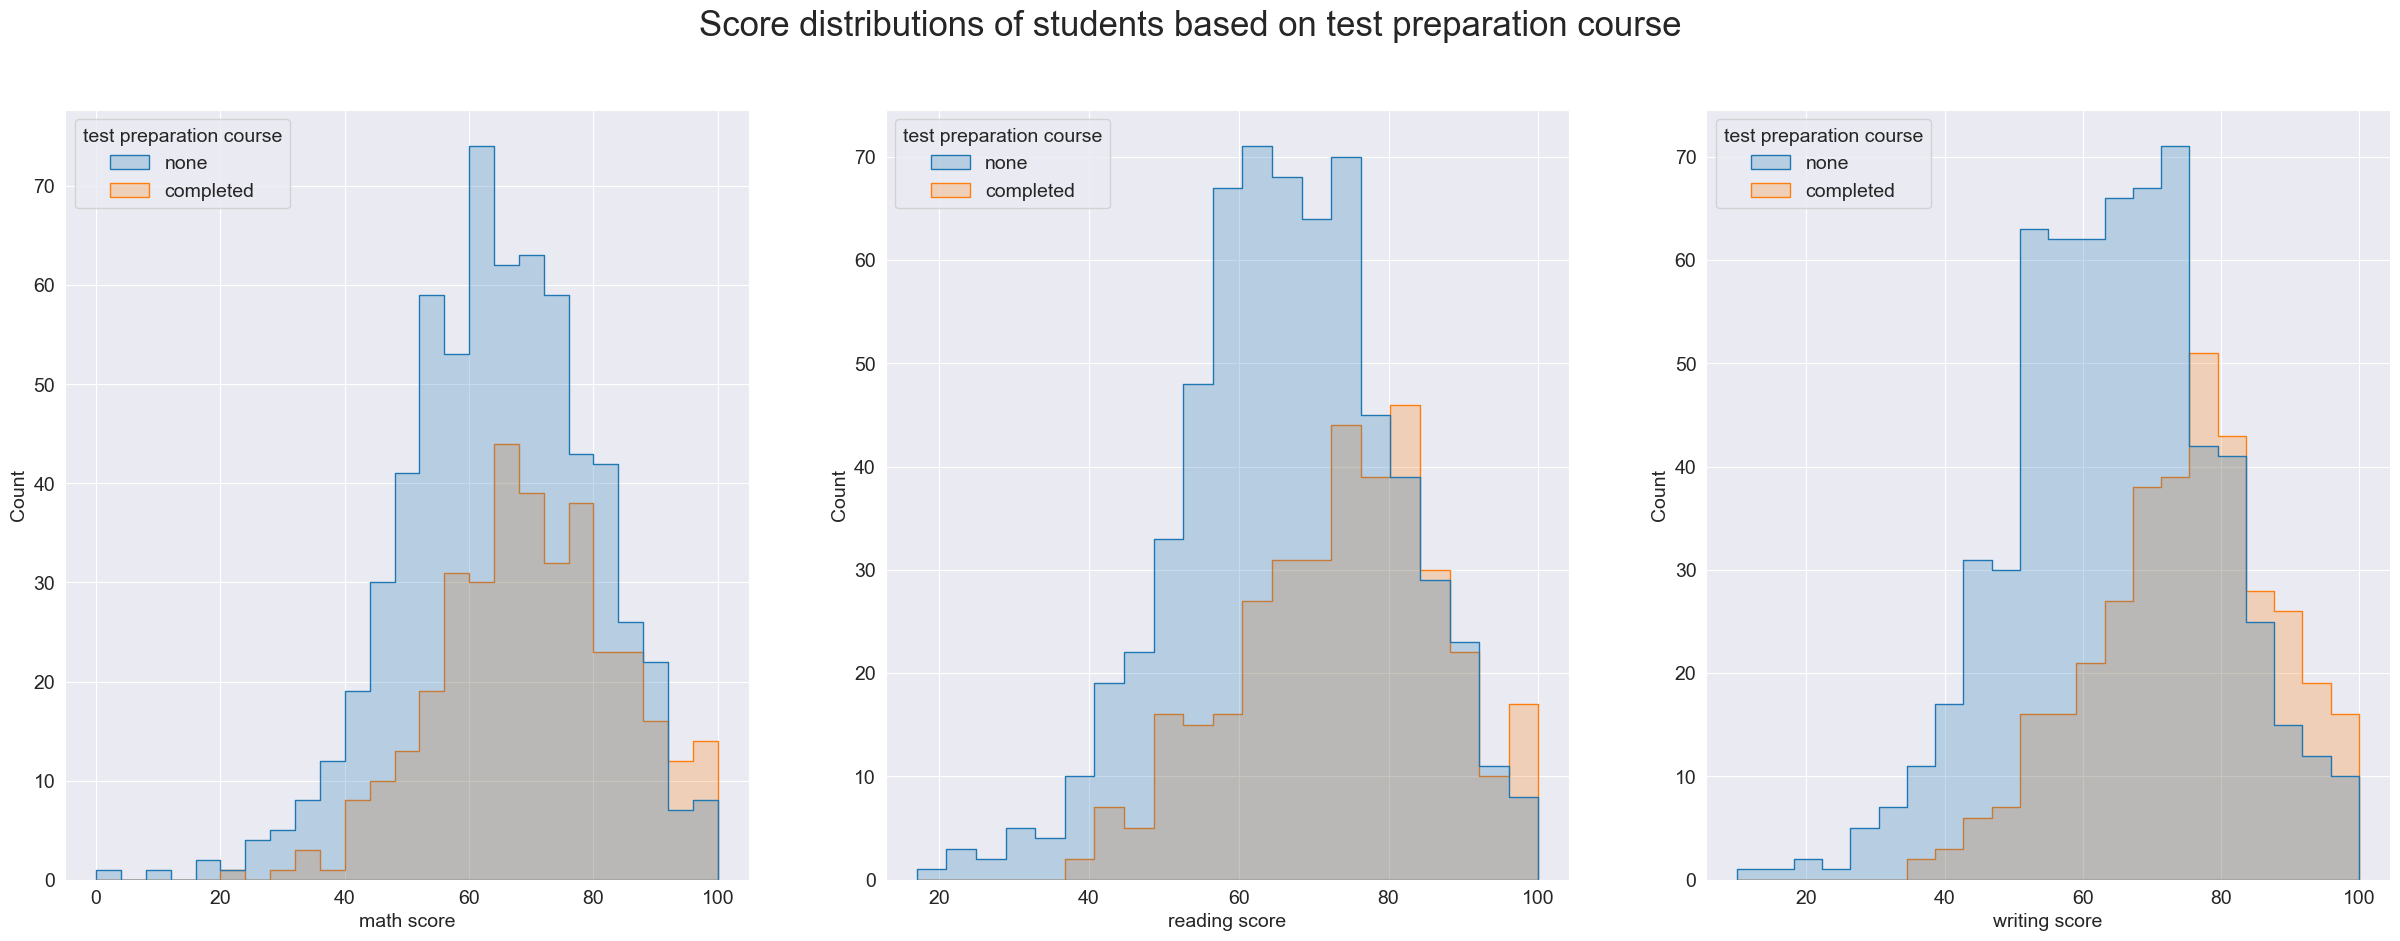

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score distributions of students based on test preparation course', size=25)

a=sns.histplot(df_performance, x='math score', ax=ax[0], hue='test preparation course', element='step')

b=sns.histplot(df_performance, x='reading score', ax=ax[1], hue='test preparation course', element='step')

c=sns.histplot(df_performance, x='writing score', ax=ax[2], hue='test preparation course', element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

- The number of students who completed the test preparation course tended to have higher scores than those who did not.

### 4. Conclusion

#### In terms of gender:
- The male sex ratio is more than 10% more than female, demonstrating the current gender imbalance
- Male tend to do better in math than female
- Female tend to do better at reading and writing than male

#### In terms of race(ethnicity):
- No discernible effect
- Group E tends to have higher scores than other groups

#### In terms of lunch (standard, free/reduced):
- The ratio of the free/reduced lunch option is much higher than the standard lunch option
- Standard lunch options tend to have higher scores than the free/reduced

#### In terms of test preparation course (completed/none):
- The number of students who did not take the exam preparation course more than the number of students who completed the course
- The number of students who completed the test preparation course tended to have higher scores than those who did not

#### In terms of parental level of education :
- Parents' education level did not have much effect on students' test scores